# Challenge 2 Tutorial

Our characters have gathered a collection of text files from the internet using the `la eterna` keyword and they want to get a general understanding of the various topics that are present in these articles. The data science term for this task is Topic Modeling and there are many different techniques to create and visualize topic models. This tutorial will focus on a specific method called Latent Dirichlet Allocation (LDA) and will present some different methods of visualizing and exploring the topics that it generates.

### Load Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import re
import os
warnings.simplefilter('ignore')

# WordCloud 
from wordcloud import WordCloud, STOPWORDS

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Gensim
import gensim, spacy, logging, warnings
import en_core_web_sm
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

"""
# Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Pyldavis 
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn

"""

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nehakoppikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\n# Sklearn\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\n\n# Pyldavis \nimport pyLDAvis\nimport pyLDAvis.gensim_models\nimport pyLDAvis.sklearn\n\n'

#### NOTE: You will have to run `python -m spacy download en_core_web_sm` to download (you cant pip install it)

## Load Dataset

In [2]:
project_dir = 'challenge2-articles'

In [3]:
# gets files from article directory
fns = []
for file_name in os.listdir(project_dir):
    if file_name.endswith('.txt'):
        fns.append(os.path.join(project_dir,file_name))

In [4]:
# this opens the txt files and appends the text files to the text dataframe 
df_txt = pd.DataFrame(columns=['fn', 'txt'])
for idx, fn in enumerate(fns):  
    print(fn)
    x = open(fn, mode="r", encoding="utf-8")
    x = x.read()  
    _df_txt = pd.DataFrame([[idx, x]],columns=['fn', 'txt'])
    df_txt = df_txt.append(_df_txt)
df_txt = df_txt.reset_index(drop=True) 

challenge2-articles/challenge2-article077.txt
challenge2-articles/challenge2-article063.txt
challenge2-articles/challenge2-article088.txt
challenge2-articles/challenge2-article103.txt
challenge2-articles/challenge2-article117.txt
challenge2-articles/challenge2-article116.txt
challenge2-articles/challenge2-article102.txt
challenge2-articles/challenge2-article089.txt
challenge2-articles/challenge2-article062.txt
challenge2-articles/challenge2-article076.txt
challenge2-articles/challenge2-article060.txt
challenge2-articles/challenge2-article074.txt
challenge2-articles/challenge2-article048.txt
challenge2-articles/challenge2-article114.txt
challenge2-articles/challenge2-article100.txt
challenge2-articles/challenge2-article128.txt
challenge2-articles/challenge2-article129.txt
challenge2-articles/challenge2-article101.txt
challenge2-articles/challenge2-article115.txt
challenge2-articles/challenge2-article049.txt
challenge2-articles/challenge2-article075.txt
challenge2-articles/challenge2-art

In [5]:
df_txt

,fn,txt
0,0,This is when the arthritis starts. A cheese t...
1,1,"Just like the other animals on this list, the..."
2,2,No better way to spend your days off than rese...
3,3,"In my garden, I grow a lot of medicinal plants..."
4,4,I was hiking through the canyon and found this...
...,...,...
140,140,La Eterna This flower was said to cure aging...
141,141,Is it legal to transport wild shrubs from La E...
142,142,My grandmother told me a story about a shrub s...
143,143,You can use this milk to make the most decade...


## Preprocess Text Files
Inspired by https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub(r'\s+', ' ', sent)  # remove newline chars
        sent = re.sub(r"\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)   

def process_words(data_words, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    # initialize bigram and trigram models 
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    monogram_texts = []
    for doc in data_words:
        doc_texts = []
        for word in simple_preprocess(str(doc)):
            if word not in stop_words:
                doc_texts.append(word)
        monogram_texts.append(doc_texts)
    texts_with_bigram = []
    for doc in monogram_texts:
        texts_with_bigram.append(bigram_mod[doc])
    texts = []
    for doc in texts_with_bigram:
        texts.append(trigram_mod[bigram_mod[doc]])
    texts_out = []
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out    

In [7]:
# takes the text dataframe, extracts the sentences and breaks the sentences into words
data = df_txt['txt'].values
data_words = list(sent_to_words(data))   

# removes stop words, forms bigrams, trigrams, lemmatizations
texts = process_words(data_words)

## Basic WordCloud Visualization

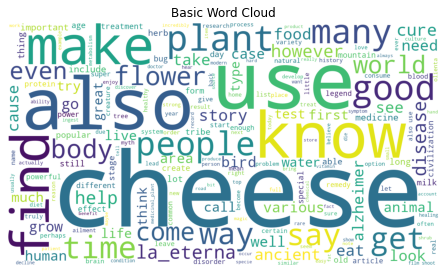

In [8]:
# explore the cleaned words dataset 
wordcloud_texts = [y for x in texts for y in x]
text_describe = pd.Series(wordcloud_texts)
wordcloud_texts = ' '.join(wordcloud_texts)
wordcloud = WordCloud(width=1280, height=720, background_color='white', stopwords=stop_words).generate(wordcloud_texts)
plt.imshow(wordcloud)
plt.title("Basic Word Cloud")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Build Initial Topic Model

In [9]:
# get unique IDs for words 
id2word = corpora.Dictionary(texts)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

num_topics=10
# Build LDA model
# update_every is for iterative learning (as opposed to batch learning) 
# chunksize is amount of data to use to train on each pass (using all given files)
# passes is amount of times to pass through the corpus 
# alpha is the prior, "symmetric" is a 1/num_topics 
# per_word_topics returns a list of likely topics (as opposed to the top topic)
ldamodel = (gensim
            .models
            .ldamodel
            .LdaModel(corpus=corpus, id2word=id2word,
                      num_topics=num_topics, random_state=100,
                      update_every=1, chunksize=len(fns), 
                      passes=100, alpha='symmetric', 
                      per_word_topics=True))

# passes data through the LDA model, identifies the topic of each sentence 
df_topics = pd.DataFrame()
for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list            
    # print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  # => dominant topic
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            df_topics = df_topics.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
            break
df_topics.columns = ['dominant_topic', 'contribution%', 'keywords']
df_topics['text'] = pd.Series(data)

In [10]:
df_topics

,dominant_topic,contribution%,keywords,text
0,5.0,0.9898,"cheese, good, make, find, get, time, milk, try...",This is when the arthritis starts. A cheese t...
1,9.0,0.9924,"plant, also, help, old, name, popular, metabol...","Just like the other animals on this list, the..."
2,5.0,0.6427,"cheese, good, make, find, get, time, milk, try...",No better way to spend your days off than rese...
3,4.0,0.9250,"cheese, good, know, probiotic, let, make, worl...","In my garden, I grow a lot of medicinal plants..."
4,6.0,0.4585,"brain, live, bug, part, type, energy_stream, a...",I was hiking through the canyon and found this...
...,...,...,...,...
140,0.0,0.6790,"people, use, ancient, know, flower, even, also...",La Eterna This flower was said to cure aging...
141,9.0,0.8875,"plant, also, help, old, name, popular, metabol...",Is it legal to transport wild shrubs from La E...
142,9.0,0.9400,"plant, also, help, old, name, popular, metabol...",My grandmother told me a story about a shrub s...
143,5.0,0.9894,"cheese, good, make, find, get, time, milk, try...",You can use this milk to make the most decade...


In [11]:
topic_model_top_words = {}
for topic_num in range(num_topics):
    word_list = [row[0] for row in ldamodel.show_topic(topic_num)]
    topic_model_top_words[f"topic_{topic_num}"] = word_list
pd.DataFrame(topic_model_top_words)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,people,cheese,cause,body,cheese,cheese,brain,alzheimer,use,plant
1,use,film,plant,stage,good,good,live,test,plant,also
2,ancient,way,human,help,know,make,bug,disease,also,help
3,know,find,la_eterna,function,probiotic,find,part,bird,help,old
4,flower,grow,call,medicine,let,get,type,brain,people,name
5,even,tribe,tribe,well,make,time,energy_stream,also,treat,popular
6,also,force,disease,repair,world,milk,animal,eat,herb,metabolism
7,many,shoot,gene,decline,food,try,way,include,cause,calcium
8,say,sacrifice,chemical,rich,protein,way,long,use,weight,die
9,story,many_different,mutation,age,milk,use,body,story,cure,find


## Search for best number of Topics

In [12]:
import math
def build_topic_model(num_topics,corpus,id2word):
    LDA_model = (gensim
                .models
                .ldamodel
                .LdaModel(corpus=corpus, id2word=id2word,
                          num_topics=num_topics, random_state=1842,
                          update_every=1, chunksize=len(fns), 
                          passes=4000, alpha='symmetric', 
                          per_word_topics=True))
    return LDA_model
def plot_wordcloud_from_lda(lda,num_topics):
    if num_topics == 2:
        fig, axes = plt.subplots(1, 2)
        for i in range(num_topics):
            word_weights = lda.show_topic(i)
            wordcloud = WordCloud(background_color='white').fit_words(dict(word_weights))
            axes[i].imshow(wordcloud)
            axes[i].set_title(f"Topic {i}")
            axes[i].axis("off")
        fig.suptitle(f"LDA with {num_topics} Topics", fontsize=20)
        plt.tight_layout(pad = 0)
        plt.show()
    else:
        rows = math.ceil(num_topics / 2)
        fig, axes = plt.subplots(rows, 2)
        for i in range(num_topics):
            word_weights = lda.show_topic(i)
            wordcloud = WordCloud(background_color='white').fit_words(dict(word_weights))
            x = i // 2
            y = i % 2
            axes[x,y].imshow(wordcloud)
            axes[x,y].set_title(f"Topic {i}")
            axes[x,y].axis("off")
        if num_topics % 2:
            x = num_topics // 2
            y = 1
            axes[x,y].axis("off")
        plt.tight_layout(pad = 0)
        fig.suptitle(f"LDA with {num_topics} Topics", fontsize=20)
        fig.subplots_adjust(top=0.85)
        plt.show()

### Build and Save Models

In [13]:
LDA_models = []
for i in range(2,11):
    model = build_topic_model(i,corpus,id2word)
    LDA_models.append(model)
    model_name = os.path.join("models",f"la_eterna_topic_model-{i}.lda")
    model.save(model_name)

### Load models from saved files 
This step is only needed if you are picking back up later and dont want to wait to rerun the previous gensim models

In [14]:
LDA_models = []
for i in range(2,11):
    model_name = os.path.join("models",f"la_eterna_topic_model-{i}.lda")
    model = gensim.models.ldamodel.LdaModel.load(model_name)
    LDA_models.append(model)

### Visualize Topic Models

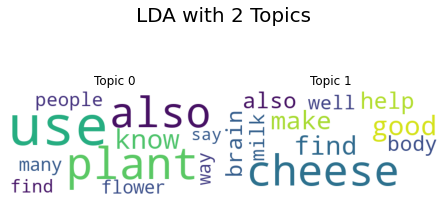

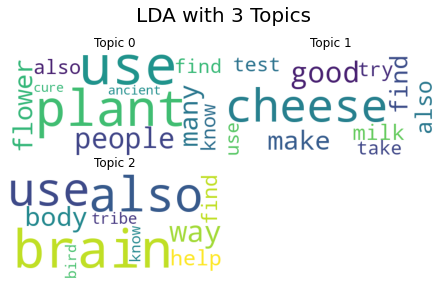

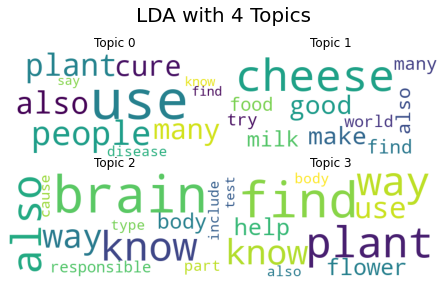

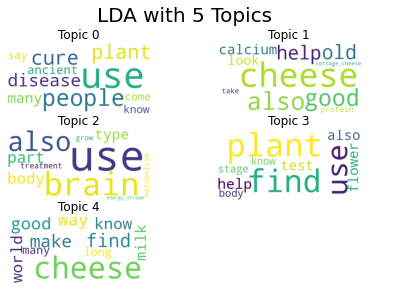

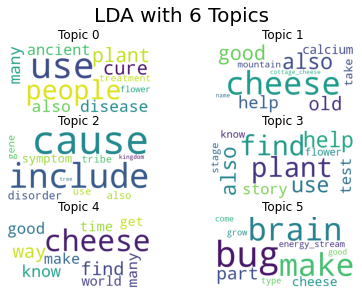

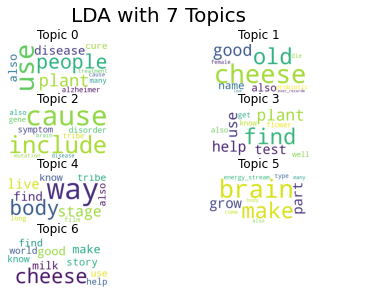

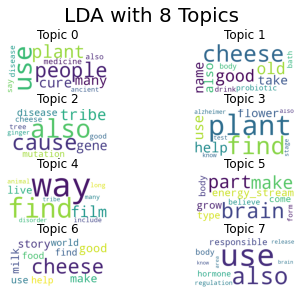

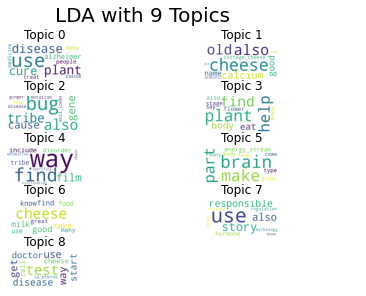

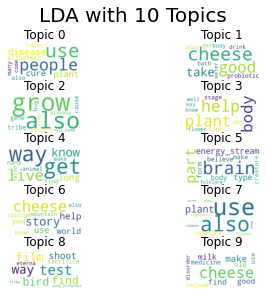

In [15]:
count = 2
for model in LDA_models:
    plot_wordcloud_from_lda(model,count)
    count += 1

### pyLDAvis

pyLDAvis Tutorials:
* https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
* https://nbviewer.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import spacy

import pickle
import re 
import pyLDAvis
#import pyLDAvis.gensim

import matplotlib.pyplot as plt 
import pandas as pd

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
articles = df_txt['txt'].values.tolist()

# Turn the list of string into a list of tokens
articles = [a.split(',') for a in articles]

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
id2word = Dictionary(articles)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in articles]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(' This is when the arthritis starts. A cheese that will bring you headaches',
   1),
  (' and fatigue', 1),
  (' and visions are just what you get.\n\nGREETINGS AFRICA\n\nWhether you are looking for a fun cheese to have with your food',
   1),
  (' but one that probably isn’t good for you that way. Noises', 1),
  (' but you’ll likely feel like you need to use a hand mixer to get it out. Either way',
   1),
  (' crunchy snack that won’t leave you thirstier for being able to have a glass of water. This is a cheese that just sounds right beside you to have beside you.',
   1),
  (' it’s definitely a cheese with a very long life in the business', 1),
  (' joint pain', 1),
  (' namely grass. The natural substance is called it’s strong smell which will strong you up. The color is a bright green',
   1),
  (' or you are simply curious about this type of cheese', 1),
  (' smells', 1),
  (' this one is surely intriguing. La Eterna \n\nMore like this:. It’s made from the same substance that l

In [24]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.006*" delusions" + 0.006*" hyperactivity" + 0.006*" loss of interest in activities that were formerly enjoyed" + 0.006*" and disorganized speech and behavior. The symptoms are caused by a chemical imbalance in the brain" + 0.004*" and many other conditions." + 0.004*" the doctor will use a blood test called a " curative test " which is a blood test that will test for the presence of a protein called beta amyloid. The protein is very similar to the one found in Alzheimer\'s. In the early years of the test" + 0.004*" which sometimes results in the person losing touch with reality. ADHD: This disorder is characterized by symptoms that include inattention" + 0.004*" and visions are just what you get.\n\nGREETINGS AFRICA\n\nWhether you are looking for a fun cheese to have with your food" + 0.004*" and impulsivity. that include inattention" + 0.004*" This is when the arthritis starts. A cheese that will bring you headaches"'), (1, '0.012*" but in reality" + 0.008*" roads" + 0.008*" t

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=articles, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


\nCoherence Score:  0.48303827676767896


In [45]:
mallet_path = 'patt/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=articles, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\\nCoherence Score: ', coherence_ldamallet)


/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'gensim.models' has no attribute 'wrappers'

### Sklearn

Tutorial <br>
https://nbviewer.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb

In [32]:
from __future__ import print_function

import pyLDAvis

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')#,
                                #max_df = 0.5, 
                                #min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df_txt)
print(dtm_tf.shape)

(2, 1)


/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df_txt)
print(dtm_tfidf.shape)

(2, 1)


/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=0)

In [44]:
import pyLDAvis.sklearn 

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: import_optional_dependency() got an unexpected keyword argument 'errors'

In [40]:
print(pd.__version__)

1.1.3


/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
!pip install pandas==1.3.1

/Users/nehakoppikar/opt/anaconda3/envs/challeng2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     |████████████████████████████████| 11.1 MB 6.2 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


## Future Areas of Improvement

Research Papers:
* http://vis.stanford.edu/files/2012-Termite-AVI.pdf
* https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf